# 目标检测PaddleDetection FasterRcnn 乐高积木检测

使用PaddleDetection实现乐高模块的检测

# 一、项目背景

此处可说明你为什么会想到做这个项目，项目的初衷是什么。

可附上效果展示。

# 二、数据集简介

介绍你的项目使用了什么数据集，一共有多少条数据，数据是什么样的等等。此处可细分，如下所示：

## 1.数据加载和预处理


```python
import paddle.vision.transforms as T

# 数据的加载和预处理
transform = T.Normalize(mean=[127.5], std=[127.5])

# 训练数据集
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)

# 评估数据集
eval_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

print('训练集样本量: {}，验证集样本量: {}'.format(len(train_dataset), len(eval_dataset)))
```

训练集样本量: 60000，验证集样本量: 10000


## 2.数据集查看


```python
print('图片：')
print(type(train_dataset[0][0]))
print(train_dataset[0][0])
print('标签：')
print(type(train_dataset[0][1]))
print(train_dataset[0][1])

# 可视化展示
plt.figure()
plt.imshow(train_dataset[0][0].reshape([28,28]), cmap=plt.cm.binary)
plt.show()

```


# 三、模型选择和开发

详细说明你使用的算法。此处可细分，如下所示：

## 1.模型组网

![](https://ai-studio-static-online.cdn.bcebos.com/08542974fd1447a4af612a67f93adaba515dcb6723ff4484b526ff7daa088915)


```python
# 模型网络结构搭建
network = paddle.nn.Sequential(
    paddle.nn.Flatten(),           # 拉平，将 (28, 28) => (784)
    paddle.nn.Linear(784, 512),    # 隐层：线性变换层
    paddle.nn.ReLU(),              # 激活函数
    paddle.nn.Linear(512, 10)      # 输出层
)
```

## 2.模型网络结构可视化


```python
# 模型封装
model = paddle.Model(network)

# 模型可视化
model.summary((1, 28, 28))
```

    ---------------------------------------------------------------------------
     Layer (type)       Input Shape          Output Shape         Param #    
    ===========================================================================
       Flatten-1       [[1, 28, 28]]           [1, 784]              0       
       Linear-1          [[1, 784]]            [1, 512]           401,920    
        ReLU-1           [[1, 512]]            [1, 512]              0       
       Linear-2          [[1, 512]]            [1, 10]             5,130     
    ===========================================================================
    Total params: 407,050
    Trainable params: 407,050
    Non-trainable params: 0
    ---------------------------------------------------------------------------
    Input size (MB): 0.00
    Forward/backward pass size (MB): 0.01
    Params size (MB): 1.55
    Estimated Total Size (MB): 1.57
    ---------------------------------------------------------------------------

    {'total_params': 407050, 'trainable_params': 407050}

## 3.模型训练


```python
# 配置优化器、损失函数、评估指标
model.prepare(paddle.optimizer.Adam(learning_rate=0.001, parameters=network.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())
              
# 启动模型全流程训练
model.fit(train_dataset,  # 训练数据集
          eval_dataset,   # 评估数据集
          epochs=5,       # 训练的总轮次
          batch_size=64,  # 训练使用的批大小
          verbose=1)      # 日志展示形式
```

    The loss value printed in the log is the current step, and the metric is the average value of previous step.
    Epoch 1/5
    step 938/938 [==============================] - loss: 0.0325 - acc: 0.9902 - 7ms/step           
    Eval begin...
    The loss value printed in the log is the current batch, and the metric is the average value of previous step.
    step 157/157 [==============================] - loss: 7.0694e-04 - acc: 0.9807 - 6ms/step     
    Eval samples: 10000
    


## 4.模型评估测试


```python
# 模型评估，根据prepare接口配置的loss和metric进行返回
result = model.evaluate(eval_dataset, verbose=1)

print(result)
```

    Eval begin...
    The loss value printed in the log is the current batch, and the metric is the average value of previous step.
    step 10000/10000 [==============================] - loss: 0.0000e+00 - acc: 0.9795 - 2ms/step         
    Eval samples: 10000
    {'loss': [0.0], 'acc': 0.9795}


## 5.模型预测

### 5.1 批量预测

使用model.predict接口来完成对大量数据集的批量预测。


```python
# 进行预测操作
result = model.predict(eval_dataset)

# 定义画图方法
def show_img(img, predict):
    plt.figure()
    plt.title('predict: {}'.format(predict))
    plt.imshow(img.reshape([28, 28]), cmap=plt.cm.binary)
    plt.show()

# 抽样展示
indexs = [2, 15, 38, 211]

for idx in indexs:
    show_img(eval_dataset[idx][0], np.argmax(result[0][idx]))
```

    Predict begin...
    step 10000/10000 [==============================] - 1ms/step        
    Predict samples: 10000


### 5.2 单张图片预测

采用model.predict_batch来进行单张或少量多张图片的预测。


```python
# 读取单张图片
image = eval_dataset[501][0]

# 单张图片预测
result = model.predict_batch([image])

# 可视化结果
show_img(image, np.argmax(result))
```

# 四、效果展示

说明你的项目应该如何去运行。

并简单说明你的项目取得了哪些成果，效果如何。最好附上图片。

# 五、总结与升华

写写你在做这个项目的过程中遇到的坑，以及你是如何去解决的。

最后一句话总结你的项目

# 个人简介

此处可附上你的AI Studio个人链接，增加曝光率。

# 目标检测PaddleDetection FasterRcnn 乐高积木检测

使用PaddleDetection实现乐高模块的检测

In [ ]:
# 安装 paddledet 
! pip install paddledet==2.1.0 -i https://mirror.baidu.com/pypi/simple

# 克隆 PaddleDetection 库
! git clone https://gitee.com/paddlepaddle/PaddleDetection.git

Looking in indexes: https://mirror.baidu.com/pypi/simple
Cloning into 'PaddleDetection'...
remote: Enumerating objects: 810, done.
remote: Counting objects: 100% (810/810), done.
remote: Compressing objects: 100% (399/399), done.
remote: Total 15385 (delta 447), reused 747 (delta 411), pack-reused 14575
Receiving objects: 100% (15385/15385), 133.28 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (11190/11190), done.
Checking connectivity... done.


# 查看数据集图片

1数据集是本人自己拍照收集，数量较少。

2数据已经按照VOC的格式处理好了

3路径为PaddleDetection/dataset/mydata2

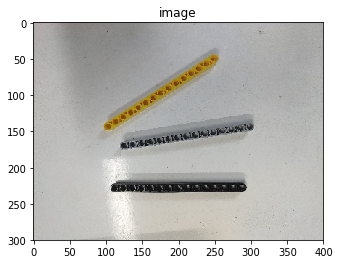

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/home/aistudio/PaddleDetection/dataset/mydata2/images/IMG_20210729_091838.jpg')

plt.figure("Image") # 图像窗口名称
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
plt.show()


PaddleDetection 安装

然后我们就可以在左边的文件结构看见多了 `PaddleDetection` 文件夹

![](https://ai-studio-static-online.cdn.bcebos.com/f4d9f2d9b5644841b1de6a525d88ad2360ca7d12256d4499aab378866220c9fb)

# 检查是否可以运行
%cd PaddleDetection 
! python ppdet/modeling/tests/test_architectures.py

In [ ]:
#进入PaddleDetection 文件夹
%cd PaddleDetection 
# 测试安装是否正确
! python ppdet/modeling/tests/test_architectures.py

/home/aistudio/PaddleDetection
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object

In [ ]:
# 快速体验
! python tools/infer.py -c configs/ppyolo/ppyolo_r50vd_dcn_1x_coco.yml -o use_gpu=False weights=https://paddledet.bj.bcebos.com/models/ppyolo_r50vd_dcn_1x_coco.pdparams --infer_img=demo/000000014439.jpg

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the

# 模型选择

模型使用PaddleDetection配置好的模型,选择使用FasterRcnn

这里我使用模仿官方的yml写好了配置文件,并附上部分注释。

yml路径为PaddleDetection/myFasterRcnn.yml

In [4]:
#  使用-r  路径+模型名称，不用带后缀，可恢复训练。
# 如 ! python tools/train.py -c myFasterRcnn.yml
%cd PaddleDetection 
! python tools/train.py -c myFasterRcnn.yml  # 开始训练
# ! python tools/train.py -c configs/faster_rcnn/faster_rcnn_r101_1x_coco.yml

[Errno 2] No such file or directory: 'PaddleDetection'
/home/aistudio/PaddleDetection
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
W0814 21:48:26.345152  8084 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0814 21:48:26.349901  8084 device_context.cc:422] device: 0, cuDNN Version: 7.6.
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will 

In [8]:
#测试
! python -u tools/infer.py -c myFasterRcnn.yml  --infer_img=dataset/mydata2/images/IMG_20210729_091826.jpg


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
W0814 22:12:40.759764  9902 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0814 22:12:40.764919  9902 device_context.cc:422] device: 0, cuDNN Version: 7.6.
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and g

# 查看预测结果

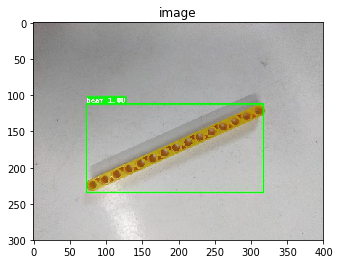

In [19]:
import os
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/home/aistudio/PaddleDetection/output/IMG_20210729_091826.jpg')

plt.figure("Image") 
plt.imshow(img)
plt.axis('on') 
plt.title('image') 
plt.show()